<a href="https://colab.research.google.com/github/shatadal88/Audio_Visualization/blob/main/Test_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize and Play

This is created as  a part of workshops conducted by Shatadal Ghosh in Python 

We can play audio data using **Jupyter** or **Colaboratory**

In this example we will use three modules:

* **numpy** to generate the audio data

* **IPython.display** to play the audio data

* **scipy.io.wavfile** to load a sound wav file

First we need to import those modules

In [1]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

We don't really need that, but we can also import our own modules available in **GitHub**

In this case we will load the **calc** module to display graphs

Any **Python** module can be loaded this way

Modules can also be loaded in the virtual machine using the **pip** installer

In [2]:
# Set to True if we are in colaboratory of False elsewere
colaboratory = True

if colaboratory:
    # Load the calc module
    !rm calc.*
    !wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py

#Import the module
import calc

# Erase output after import
from IPython.display import clear_output
clear_output()

# Check loaded module
try:
    print('calc version: ',calc.version)
except:
    print('Error loading the calc module')

calc version:  2/7/2018B


We can create the audio using code thanks to the **numpy** math facilities



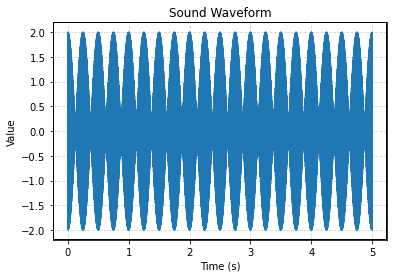

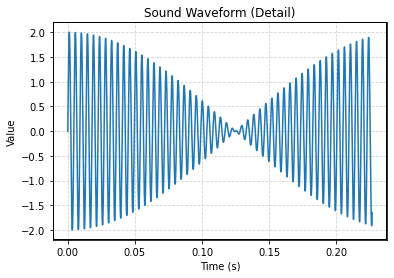

In [9]:
# Create a sound
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)

# Indicate the calc module if we are inside colaboratory
calc.setColaboratory(colaboratory)

# Show waveform
calc.plot11(t,data,"Sound Waveform","Time (s)","Value")

# We can zoom the start of the waveform
calc.plot11(t[0:10000],data[0:10000],"Sound Waveform (Detail)","Time (s)","Value")
# Generate a player for mono sound
Audio(data,rate=framerate,autoplay =True)

The **sound** can be shown using, for instance, the loaded **calc** module.

It could also be shown using direct calls the **matplotlib** module

Audio data can also be generated in **stereo**

We will first generate and show the waveforms

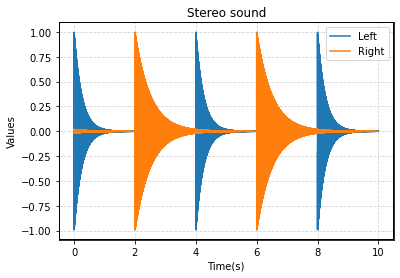

In [7]:
# Base sound
def base(t):
    return np.sin(2*np.pi*220*t)*np.exp(-2*t)
    
tLeft  = 8*(t/4 - np.fix(t/4))
left   = base(tLeft)

tRight = 4*((t+2)/4 - np.fix((t+2)/4))
right  = base(tRight)

# Show sound
calc.plot1n(t,[left,right],"Stereo sound","Time(s)","Values",["Left","Right"])

# Can also do stereo or more channels
Audio([left, right],rate=framerate,autoplay =True)

The sound data don't need to be generated from code, it can be loade from **wav** files

In the case of **Jupyter notebooks** they can be in your computer

In the case of **Colaboratory notebooks** they need to be available on internet

One way to make a file available on internet is using **GitHub**

In [ ]:
if colaboratory:
    # Load sound file from GitHub
    !wget https://github.com/R6500/Python-bits/raw/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
  
    # Erase output after import
    from IPython.display import clear_output
    clear_output()

    print("Bicycle bell 3.wav loaded")
else:
    print("We are not in colaboratory")
    print("The file shall already be in the computer")

Bicycle bell 3.wav loaded


Once the file is saved in the **virtual machine**, it can be read on a numpy array and decoded as sound information

In [ ]:
# Load the file on an object
data = wavfile.read('Bicycle bell 3.wav')

# Separete the object elements
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

Sample rate: 48000 Hz
Total time: 19.4594375 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


The loaded sound data can be shown on a graph, if needed

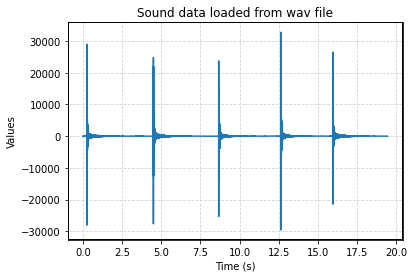

In [ ]:
# Show the sound data
calc.plot11(time,sounddata,"Sound data loaded from wav file","Time (s)","Values")

And, of course, it can be played

In [ ]:
# Generate a player for mono sound
Audio(sounddata,rate=framerate)